# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos? 

In [ ]:
# CARGA DE DATOS Y ANALISIS EXPLORATORIO 

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Cargar los datos (asumiendo que los datos están en un archivo CSV llamado 'ventas_muebles.csv')
df = pd.read_csv('C:/Users/rodri/OneDrive/Escritorio/DATA_SCIENCE/CODIGO_CLASES/TheBridge_DSPT_ML/Supervisado/Regesión/Regularización/ejercicios/data/Advertising.csv') 

In [8]:
# Mostrar las primeras filas del DataFrame
print(df.head()) 

   Unnamed: 0     TV  radio newpaper    sales
0           0  230.1   37.8    6s9.2  22100.0
1           1   44.5   39.3     45.1  10400.0
2           2   17.2   45.9     69.3   9300.0
3           3  151.5   41.3     58.5  18500.0
4           4  180.8   10.8     58.4  12900.0


In [9]:
# Descripción estadística del DataFrame
print(df.describe()) 

       Unnamed: 0          TV       radio         sales
count  200.000000  200.000000  200.000000    200.000000
mean    99.500000  147.042500   23.264000  14022.500000
std     57.879185   85.854236   14.846809   5217.456566
min      0.000000    0.700000    0.000000   1600.000000
25%     49.750000   74.375000    9.975000  10375.000000
50%     99.500000  149.750000   22.900000  12900.000000
75%    149.250000  218.825000   36.525000  17400.000000
max    199.000000  296.400000   49.600000  27000.000000


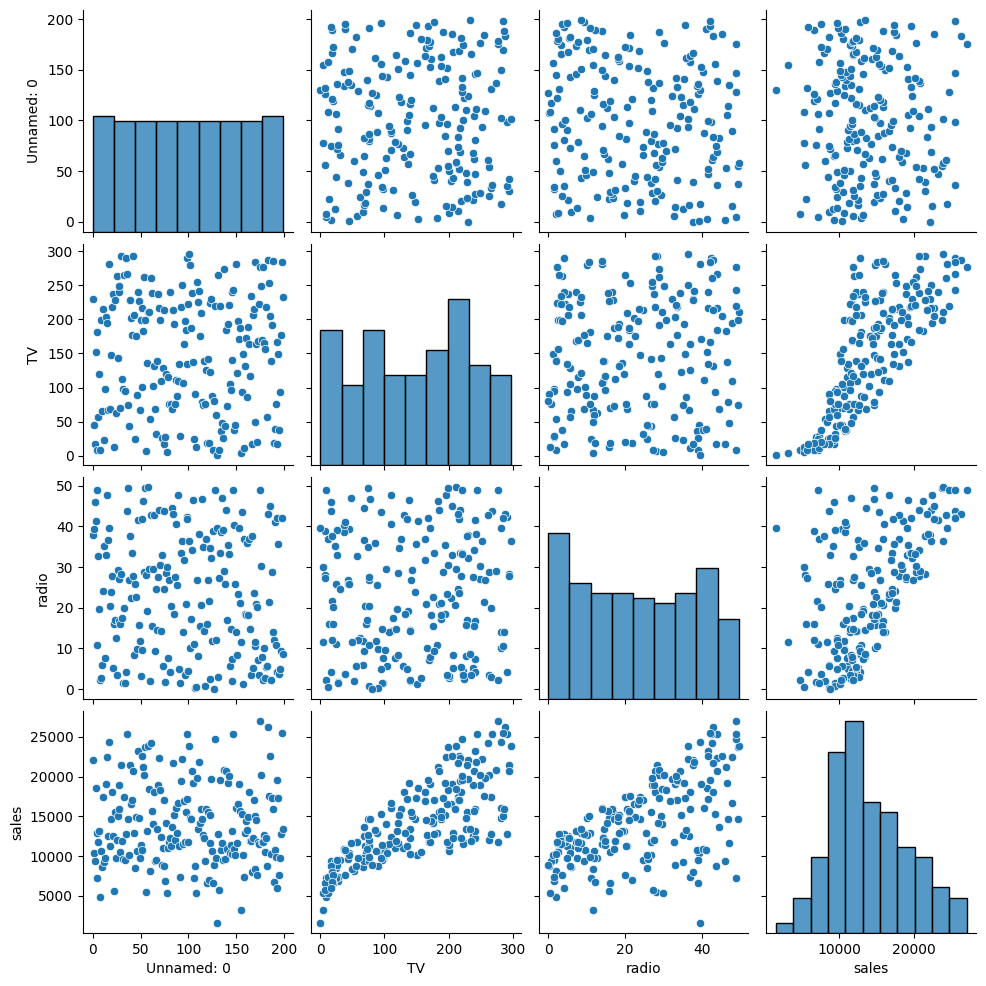

In [10]:
# Visualización de las correlaciones entre las variables
sns.pairplot(df)
plt.show() 

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv('C:/Users/rodri/OneDrive/Escritorio/DATA_SCIENCE/CODIGO_CLASES/TheBridge_DSPT_ML/Supervisado/Regesión/Regularización/ejercicios/data/Advertising.csv')







   Unnamed: 0     TV  radio newpaper    sales
0           0  230.1   37.8    6s9.2  22100.0
1           1   44.5   39.3     45.1  10400.0
2           2   17.2   45.9     69.3   9300.0
3           3  151.5   41.3     58.5  18500.0
4           4  180.8   10.8     58.4  12900.0
Unnamed: 0      int64
TV            float64
radio         float64
newpaper       object
sales         float64
dtype: object
Columnas no numéricas: Index(['newpaper'], dtype='object')
Valores únicos en la columna newpaper: ['6s9.2' '45.1' '69.3' '58.5' '58.4' '75.0' '23.5' '11.6' '1.0' '21.2'
 '24.2' '4.0' '65.9' '7.2' '46.0' '52.9' '114.0' '55.8' '18.3' '19.1'
 '53.4' '49.6' '26.2' '19.5' '12.6' '22.9' '40.8' '43.2' '38.6' '30.0'
 '0.3' '7.4' '8.5' '5.0' '45.7' '35.1' '32.0' '31.6' '38.7' '1.8' '26.4'
 '43.3' '31.5' '35.7' '18.5' '49.9' '36.8' '34.6' '3.6' '39.6' '58.7'
 '15.9' '60.0' '41.4' '16.6' '37.7' '9.3' '21.4' '54.7' '27.3' '8.4'
 '28.9' '0.9' '2.2' '10.2' '11.0' '27.2' '31.7' '19.3' '31.3' '13.1'
 '89.4' '

In [22]:
# Verificar los tipos de datos
print(df.dtypes) 

Unnamed: 0      int64
TV            float64
radio         float64
newpaper      float64
sales         float64
dtype: object


In [23]:
# Identificar columnas no numéricas
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
print("Columnas no numéricas:", non_numeric_columns) 

Columnas no numéricas: Index([], dtype='object')


In [24]:
# Inspeccionar valores no numéricos en las columnas problemáticas
for column in non_numeric_columns:
    print(f"Valores únicos en la columna {column}:", df[column].unique()) 

In [25]:
# Lista de columnas esperadas
columns_to_check = ['TV', 'radio', 'newpaper', 'sales']

# Inspección y limpieza de cada columna
for column in columns_to_check:
    print(f"Valores únicos en la columna {column} antes de la limpieza:", df[column].unique())
    df[column] = pd.to_numeric(df[column], errors='coerce')  # Convertir valores a numéricos, convirtiendo no numéricos a NaN
    df = df[df[column].notna()]  # Remover filas con NaN

# Verificar nuevamente los tipos de datos
print(df.dtypes) 

Valores únicos en la columna TV antes de la limpieza: [ 44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7  23.8
  97.5 204.1 195.4  67.8 281.4  69.2 147.3 218.4 237.4  13.2 228.3  62.3
 262.9 142.9 240.1 248.8  70.6 292.9 112.9  97.2 265.6  95.7 290.7 266.9
  74.7  43.1 228.  202.5 177.  293.6 206.9  25.1 175.1  89.7 239.9 227.2
  66.9 100.4 216.4 182.6 262.7 198.9   7.3 136.2 210.8 210.7  53.5 261.3
 239.3 102.7 131.1  69.   31.5 139.3 216.8 199.1 109.8  26.8 129.4 213.4
  16.9  27.5 120.5   5.4 116.   76.4 239.8  75.3  68.4 213.5 193.2  76.3
 110.7  88.3 134.3  28.6 217.7 250.9 107.4 163.3 197.6 184.9 289.7 135.2
 222.4 296.4 280.2 187.9 238.2 137.9  25.   90.4  13.1 255.4 225.8 241.7
 175.7 209.6  78.2  75.1 139.2 125.7  19.4 141.3  18.8 224.  123.1 229.5
  87.2   7.8  80.2 220.3  59.6   0.7 265.2   8.4 219.8  36.9  48.3  25.6
 273.7  43.   73.4 193.7 220.5 104.6  96.2 140.3 243.2  38.   44.7 280.7
 121.  171.3 187.8   4.1  93.9 149.8  11.7 131.7 172.5  85.7 188.4 163

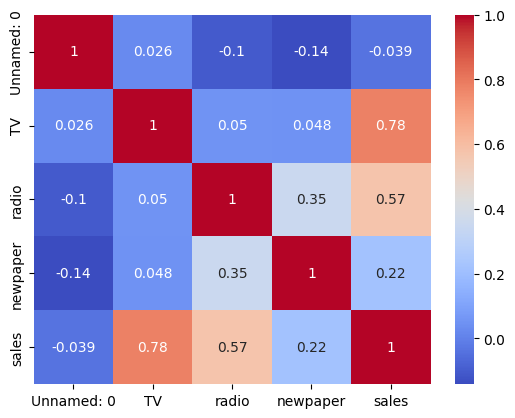

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación
corr_matrix = df.corr()

# Visualización de la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show() 

In [28]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Definir las características (X) y la variable objetivo (y)
X = df.drop('sales', axis=1)
y = df['sales'] 

In [29]:
# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [30]:
# Modelos de regresión
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elasticnet = ElasticNet() 

In [31]:
# Parámetros para GridSearchCV
ridge_params = {'alpha': [0.1, 1, 10, 100]}
lasso_params = {'alpha': [0.1, 1, 10, 100]}
elasticnet_params = {'alpha': [0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.9]} 

In [32]:
# Búsqueda de los mejores hiperparámetros
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5)
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5)
elasticnet_grid = GridSearchCV(elasticnet, elasticnet_params, cv=5) 

In [34]:
# Entrenamiento de los modelos
ridge_grid.fit(X_train, y_train)
lasso_grid.fit(X_train, y_train)
elasticnet_grid.fit(X_train, y_train) 

# Mejores modelos
best_ridge = ridge_grid.best_estimator_
best_lasso = lasso_grid.best_estimator_
best_elasticnet = elasticnet_grid.best_estimator_ 

In [35]:
# Predicciones
y_pred_lr = lr.fit(X_train, y_train).predict(X_test)
y_pred_ridge = best_ridge.predict(X_test)
y_pred_lasso = best_lasso.predict(X_test)
y_pred_elasticnet = best_elasticnet.predict(X_test) 

In [36]:
# Evaluación de los modelos
models = ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet']
predictions = [y_pred_lr, y_pred_ridge, y_pred_lasso, y_pred_elasticnet]

for model, y_pred in zip(models, predictions):
    print(f'{model} - RMSE: {mean_squared_error(y_test, y_pred, squared=False)}, R2: {r2_score(y_test, y_pred)}') 

Linear Regression - RMSE: 1592.308190302649, R2: 0.8812057394065725
Ridge - RMSE: 1593.492651206238, R2: 0.8810289401015101
Lasso - RMSE: 1591.76728654675, R2: 0.8812864340211789
ElasticNet - RMSE: 1601.3137590260358, R2: 0.8798582174510218


c:\Users\rodri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\rodri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\rodri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\rodri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarnin

In [41]:
# Coeficientes del mejor modelo (asumimos que ElasticNet es el mejor basado en RMSE y R2)
best_model = best_elasticnet

print("Coeficientes del modelo ElasticNet:") 

for feature, coef in zip(X.columns, best_model.coef_):
    print(f"{feature}: {coef}") 

Coeficientes del modelo ElasticNet:
Unnamed: 0: 0.9342070107148586
TV: 47.983462542896824
radio: 179.11429766984668
newpaper: 3.158817383673486


In [42]:
# Fórmula del modelo
intercept = best_model.intercept_
formula = f"ventas = {intercept}"
for feature, coef in zip(X.columns, best_model.coef_):
    formula += f" + ({coef} * {feature})"
print("Fórmula del modelo:", formula) 

Fórmula del modelo: ventas = 2539.818172124016 + (0.9342070107148586 * Unnamed: 0) + (47.983462542896824 * TV) + (179.11429766984668 * radio) + (3.158817383673486 * newpaper)


In [43]:
# Interpretación del impacto de las inversiones
impacto_radio = best_model.coef_[X.columns.get_loc('radio')]
impacto_tv = best_model.coef_[X.columns.get_loc('TV')]
impacto_periodicos = best_model.coef_[X.columns.get_loc('newpaper')]

print(f"Impacto de aumentar la inversión en radio en un punto: {impacto_radio}")
print(f"Impacto de aumentar la inversión en TV en un punto: {impacto_tv}")
print(f"Impacto de aumentar la inversión en periódicos en un punto: {impacto_periodicos}") 

Impacto de aumentar la inversión en radio en un punto: 179.11429766984668
Impacto de aumentar la inversión en TV en un punto: 47.983462542896824
Impacto de aumentar la inversión en periódicos en un punto: 3.158817383673486


In [44]:
'''Explicación de la fórmula y los impactos:
La fórmula del modelo se construye utilizando los coeficientes obtenidos del modelo ElasticNet. Cada coeficiente representa el
cambio en las ventas cuando la respectiva variable de gasto en publicidad se incrementa en una unidad, manteniendo las otras 
variables constantes.

Por ejemplo, si el coeficiente para radio es 2.5, esto significa que aumentar la inversión en publicidad en radio en una 
unidad incrementaría las ventas en 2.5 unidades, asumiendo que todas las demás variables se mantienen constantes.

Este flujo de trabajo proporciona un análisis completo y detallado de los datos de ventas y crea modelos predictivos utilizando 
técnicas de regresión regularizadas.''' 

'Explicación de la fórmula y los impactos:\nLa fórmula del modelo se construye utilizando los coeficientes obtenidos del modelo ElasticNet. Cada coeficiente representa el\ncambio en las ventas cuando la respectiva variable de gasto en publicidad se incrementa en una unidad, manteniendo las otras \nvariables constantes.\n\nPor ejemplo, si el coeficiente para radio es 2.5, esto significa que aumentar la inversión en publicidad en radio en una \nunidad incrementaría las ventas en 2.5 unidades, asumiendo que todas las demás variables se mantienen constantes.\n\nEste flujo de trabajo proporciona un análisis completo y detallado de los datos de ventas y crea modelos predictivos utilizando \ntécnicas de regresión regularizadas.'